## UK house price prediction Exploratory data analysis (EDA)
#### Data Source: HM Land Registry Price Pai Data <a href="https://data.gov.uk/dataset/4c9b7641-cf73-4fd9-869a-4bfeed6d440e/hm-land-registry-price-paid-data">Link<a/>

_Author **Shereef Bankole**_
<br/> **LinkedIn click** <a href="https://www.linkedin.com/in/shereef-b-b9aab823/">Here<a/>
<br/> **Github click**  <a href="https://github.com/SAB-6">Here<a/>

<img src="https://cdn.images.express.co.uk/img/dynamic/23/590x/BREXIT-HOUSE-PRICES-829811.jpg"/>

from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
root_directory = '.'
#file_path = os.path.join (root_directory, 'drive', 'My Drive', 'pp-complete.csv')

### Import data and extract relevant columns

In [0]:
df=pd.read_csv(file_path, chunksize=100000, header=None)

In [0]:
chunk_list=[]
for chunk in df:
    chunk_filter=chunk.loc[:,[1,2,4,5,6,11]]
    chunk_list.append(chunk_filter)
df=pd.concat(chunk_list)

### Set the columns heading

In [0]:
df.columns=[['Price','Date_of_Transfer','Property_Type','Odd/New', 'Duration','City']]

### Preview the data

In [0]:
df.head(5)

,Price,Date_of_Transfer,Property_Type,Odd/New,Duration,City
0,42000,1995-12-21 00:00,S,N,F,NEWCASTLE UPON TYNE
1,95000,1995-03-03 00:00,S,N,F,GRAYS
2,74950,1995-10-03 00:00,D,Y,F,MIDDLEWICH
3,43500,1995-11-14 00:00,S,N,F,BILLINGHAM
4,63000,1995-09-08 00:00,S,N,F,CLEATOR MOOR


In [0]:
df.tail(5)

,Price,Date_of_Transfer,Property_Type,Odd/New,Duration,City
24678169,365000,2019-08-09 00:00,D,N,F,CHRISTCHURCH
24678170,205000,2019-07-19 00:00,F,N,L,BOURNEMOUTH
24678171,463000,2019-07-24 00:00,D,N,F,FERNDOWN
24678172,245000,2019-08-05 00:00,D,N,F,POOLE
24678173,320000,2019-07-26 00:00,D,N,F,GILLINGHAM


In [0]:
df.shape

(24678174, 6)

For consitency all column headings should be converted to strings

In [0]:
df.columns = list(map(str, df.columns))

In [0]:
all(isinstance(column, str) for column in df.columns)

True

In [0]:
df.head()

,"('Price',)","('Date_of_Transfer',)","('Property_Type',)","('Odd/New',)","('Duration',)","('City',)"
0,42000,1995-12-21 00:00,S,N,F,NEWCASTLE UPON TYNE
1,95000,1995-03-03 00:00,S,N,F,GRAYS
2,74950,1995-10-03 00:00,D,Y,F,MIDDLEWICH
3,43500,1995-11-14 00:00,S,N,F,BILLINGHAM
4,63000,1995-09-08 00:00,S,N,F,CLEATOR MOOR


The column headings now look messy and in order to be able to use .column notation they require some cleaning up

In [0]:
df.columns=df.columns.str.replace("(","").str.replace("'","").str.replace(",","").str.replace(")","")

In [0]:
df.head()

,Price,Date_of_Transfer,Property_Type,Odd/New,Duration,City
0,42000,1995-12-21 00:00,S,N,F,NEWCASTLE UPON TYNE
1,95000,1995-03-03 00:00,S,N,F,GRAYS
2,74950,1995-10-03 00:00,D,Y,F,MIDDLEWICH
3,43500,1995-11-14 00:00,S,N,F,BILLINGHAM
4,63000,1995-09-08 00:00,S,N,F,CLEATOR MOOR


In [0]:
#pd.DataFrame(df.City.value_counts()).to_csv(os.path.join(root_directory,'drive','My Drive','unique_towns.csv'))

In [0]:
cities = pd.DataFrame(df.City.value_counts())

In [0]:
cities.head()

,City
LONDON,1922913
MANCHESTER,403836
BRISTOL,379231
BIRMINGHAM,363862
NOTTINGHAM,322608


In [0]:
#_=cities.sort_values(by='City', ascending=False).head(10).plot(kind='barh', color= 'green', figsize=(12,8))
#plt.title('Number of houses per cities')
#plt.xlabel('Counts')
#plt.ylabel('cities')

In [0]:
towns=list(cities.index)

In [0]:
import requests
url = 'http://api.openweathermap.org/data/2.5/weather'
key = '************************'
latitude_longitude={}
for town in towns:
  full_url = url+'?apikey='+ key+'&q='+ town + '&units=metric'
  response = requests.get(full_url).json()
  try:
      latitude_longitude[town] = {'latitude': response['coord']['lat'], 'longitude': response['coord']['lon']}
  except:
    print(town)

lat_long= pd.DataFrame(latitude_longitude).transpose()

In [0]:
lat_long.to_csv(os.path.join(root_directory,'drive','My Drive','lat_long.csv'))

In [0]:
lat_long_new = pd.read_excel(os.path.join(root_directory,'drive','My Drive','lat_lg.xlsx'))

In [0]:
lat_long_new.columns =[['City', 'Latitude', 'Longitude']]
lat_long_new.head()

,City,Latitude,Longitude
0,LONDON,51.51,-0.13
1,MANCHESTER,53.48,-2.24
2,BRISTOL,41.83,-71.17
3,BIRMINGHAM,33.52,-86.8
4,NOTTINGHAM,52.95,-1.15


In [0]:
#all(isinstance(column, str) for column in lat_long_new.columns)
lat_long_new.columns = list(map(str, lat_long_new.columns))

In [0]:
all(isinstance(column, str) for column in lat_long_new.columns)

True

In [0]:
lat_long_new.head()

,"('City',)","('Latitude',)","('Longitude',)"
0,LONDON,51.51,-0.13
1,MANCHESTER,53.48,-2.24
2,BRISTOL,41.83,-71.17
3,BIRMINGHAM,33.52,-86.8
4,NOTTINGHAM,52.95,-1.15


In [0]:
lat_long_new.columns= lat_long_new.columns.str.replace("(","").str.replace("'","").str.replace(",","").str.replace(")","")
lat_long_new.head()

,City,Latitude,Longitude
0,LONDON,51.51,-0.13
1,MANCHESTER,53.48,-2.24
2,BRISTOL,41.83,-71.17
3,BIRMINGHAM,33.52,-86.8
4,NOTTINGHAM,52.95,-1.15


In [0]:
lat_long_1 = lat_long_new.copy()

In [0]:
lat_long_1.set_index('City', inplace =True)
lat_long_1.head()

,Latitude,Longitude
City,,
LONDON,51.51,-0.13
MANCHESTER,53.48,-2.24
BRISTOL,41.83,-71.17
BIRMINGHAM,33.52,-86.8
NOTTINGHAM,52.95,-1.15


In [0]:
#lat_long_1.Latitude

In [0]:
dataset = df.copy()
dataset.head()

,Price,Date_of_Transfer,Property_Type,Odd/New,Duration,City
0,42000,1995-12-21 00:00,S,N,F,NEWCASTLE UPON TYNE
1,95000,1995-03-03 00:00,S,N,F,GRAYS
2,74950,1995-10-03 00:00,D,Y,F,MIDDLEWICH
3,43500,1995-11-14 00:00,S,N,F,BILLINGHAM
4,63000,1995-09-08 00:00,S,N,F,CLEATOR MOOR


In [0]:
#lat_long_1.loc['LONDON']

## Generate new features from the date of transfer and web scraping latitudes and longitudes for the cities

In [0]:
Latitude, Longitude = [], []
for city in dataset.City:
  if(city in list(lat_long_1.index)):
    #print(city)
    lat, long = lat_long_1.loc[city]
    Latitude.append(lat)
    Longitude.append(long)
dataset['Latitude'], dataset['Longitude'] = Latitude, Longitude
dataset.head()
    

,Price,Date_of_Transfer,Property_Type,Odd/New,Duration,City,Latitude,Longitude
0,42000,1995-12-21 00:00,S,N,F,NEWCASTLE UPON TYNE,54.97,-1.61
1,95000,1995-03-03 00:00,S,N,F,GRAYS,51.48,0.33
2,74950,1995-10-03 00:00,D,Y,F,MIDDLEWICH,53.19,-2.44
3,43500,1995-11-14 00:00,S,N,F,BILLINGHAM,54.61,-1.29
4,63000,1995-09-08 00:00,S,N,F,CLEATOR MOOR,54.52,-3.52


In [0]:
dataset.to_csv(os.path.join(root_directory,'drive','My Drive','uk_house_price_data.csv'))

In [0]:
dataset = pd.read_csv(os.path.join(root_directory,'drive','My Drive','uk_house_price_data.csv'))

In [2]:
dataset = pd.read_csv('uk_house_price_data.csv')

In [3]:
dataset= dataset.iloc[:,1:]
#dataset.head()

#### Create new features from date of transfer by splitting it to year, month and day

In [4]:
def date(data):
    try:
        data = data.replace(' 00:00','')
        year, month, day = data.split('-')
        return year, month, day
    except:
        np.nan, np.nan, np.nan

dataset['Year'], dataset['Month'], dataset['Day'] = zip(*dataset['Date_of_Transfer'].apply(date))

#### Apply function to return the real categorical values (without abbreviations) in some columns (Old/New, Property Type and Duration)

In [5]:
def rename_on(data):
    if data == 'N': return 'New'
    else: return 'Old'

def rename_pt(data):
    if data == 'T': return 'Terraced'
    elif data == 'S': return 'Semi-Detached'
    elif data == 'D': return 'Detached'
    elif data == 'F': return 'Flats/Maisonettes'
    else: return 'Others'

def rename_duration(data):
    if data == 'F': return 'Freehold'
    elif data == 'L': return 'Leasehold'
    else: return 'Others'

dataset.rename(columns={'Odd/New': 'Old/New'},inplace = True)

dataset['Old/New'] = dataset['Old/New'].apply(rename_on)
dataset.Property_Type = dataset.Property_Type.apply(rename_pt)
dataset.Duration = dataset.Duration.apply(rename_duration)
dataset.head()

,Price,Date_of_Transfer,Property_Type,Old/New,Duration,City,Latitude,Longitude,Year,Month,Day
0,42000,1995-12-21 00:00,Semi-Detached,New,Freehold,NEWCASTLE UPON TYNE,54.97,-1.61,1995,12,21
1,95000,1995-03-03 00:00,Semi-Detached,New,Freehold,GRAYS,51.48,0.33,1995,03,03
2,74950,1995-10-03 00:00,Detached,Old,Freehold,MIDDLEWICH,53.19,-2.44,1995,10,03
3,43500,1995-11-14 00:00,Semi-Detached,New,Freehold,BILLINGHAM,54.61,-1.29,1995,11,14
4,63000,1995-09-08 00:00,Semi-Detached,New,Freehold,CLEATOR MOOR,54.52,-3.52,1995,09,08


In [0]:
#dataset = dataset_new.copy()
#dataset.drop('Date_of_Transpfer', axis =1, inplace=True)
#dataset.head

#### Drop Date_of_Transfer rearrange the columns

In [7]:
dataset.drop(['Date_of_Transfer'], inplace=True, axis=1)
dataset=dataset[['Property_Type','Old/New','Duration','City','Latitude','Longitude','Year','Month','Day','Price']]
dataset.head()

,Property_Type,Old/New,Duration,City,Latitude,Longitude,Year,Month,Day,Price
0,Semi-Detached,New,Freehold,NEWCASTLE UPON TYNE,54.97,-1.61,1995,12,21,42000
1,Semi-Detached,New,Freehold,GRAYS,51.48,0.33,1995,03,03,95000
2,Detached,Old,Freehold,MIDDLEWICH,53.19,-2.44,1995,10,03,74950
3,Semi-Detached,New,Freehold,BILLINGHAM,54.61,-1.29,1995,11,14,43500
4,Semi-Detached,New,Freehold,CLEATOR MOOR,54.52,-3.52,1995,09,08,63000


## Explore for missing data

In [0]:
dataset.isnull().sum().sort_values(ascending=False)

Price            0
Day              0
Month            0
Year             0
Longitude        0
Latitude         0
City             0
Duration         0
Odd/New          0
Property_Type    0
dtype: int64

* No  Missing value

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24678174 entries, 0 to 24678173
Data columns (total 10 columns):
Property_Type    object
Odd/New          object
Duration         object
City             object
Latitude         float64
Longitude        object
Year             object
Month            object
Day              object
Price            int64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.8+ GB


## Getting each column into the right data type

In [8]:
def convert_int(data):
  data = data.astype(int)
  return data

dataset[['Year', 'Month','Day']] = dataset[['Year', 'Month','Day']].apply(convert_int)
dataset['Longitude'] = dataset['Longitude'].astype(float)

### Brief statistical summary of the data

In [0]:
#Summary statistics for only categorical variables
dataset.describe(include=['O']).transpose()

,count,unique,top,freq
Property_Type,24678174,5,T,7495842
Odd/New,24678174,2,N,22092409
Duration,24678174,3,F,18840397
City,24678174,1171,LONDON,1922913


In [0]:
#summary statistics including only the numerical variables
dataset.describe()

,Latitude,Longitude,Year,Month,Day,Price
count,2.467817e+07,2.467817e+07,2.467817e+07,2.467817e+07,2.467817e+07,2.467817e+07
mean,4.981384e+01,-7.906256e+00,2.006313e+03,6.761566e+00,1.708426e+01,1.941126e+05
std,1.056412e+01,2.993457e+01,7.060981e+00,3.328403e+00,9.049399e+00,7.212366e+05
min,-4.353000e+01,-1.229100e+02,1.995000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,5.123000e+01,-2.620000e+00,2.000000e+03,4.000000e+00,9.000000e+00,7.850000e+04
50%,5.167000e+01,-1.450000e+00,2.005000e+03,7.000000e+00,1.800000e+01,1.375000e+05
75%,5.310000e+01,-1.900000e-01,2.013000e+03,1.000000e+01,2.500000e+01,2.250000e+05
max,5.723000e+01,1.747800e+02,2.019000e+03,1.200000e+01,3.100000e+01,5.943000e+08


### The minimum house price is 1995 though 2019 is £1, this is incredible.
### - 96 houses sold for £1

In [0]:
print(dataset[dataset.Price==1].shape)
dataset[dataset.Price==1]

(96, 10)


,Property_Type,Old/New,Duration,City,Latitude,Longitude,Year,Month,Day,Price
97025,Terraced,New,Freehold,ILFRACOMBE,51.21,-4.11,1995,4,18,1
488868,Terraced,New,Freehold,MANCHESTER,53.48,-2.24,1995,8,4,1
519712,Terraced,New,Freehold,KINGSTON UPON THAMES,51.41,-0.31,1995,9,11,1
523286,Semi-Detached,New,Freehold,LONDON,51.51,-0.13,1995,3,17,1
523734,Semi-Detached,New,Freehold,HITCHIN,51.95,-0.27,1995,12,8,1
...,...,...,...,...,...,...,...,...,...,...
22973228,Flats/Maisonettes,New,Leasehold,HAVANT,50.86,-0.99,2017,10,25,1
22973229,Flats/Maisonettes,New,Leasehold,HAVANT,50.86,-0.99,2017,10,25,1
23131450,Detached,New,Leasehold,ASHTON-UNDER-LYNE,53.49,-2.10,2018,7,12,1
23362738,Detached,New,Leasehold,MOLD,53.17,-3.14,2018,10,3,1


### Identifying outliers using interquartile rule

In [0]:
Stats=dataset.Price.describe()
INTQ=Stats["75%"]-Stats["25%"]
UPPER_Q=Stats["75%"]+1.5*INTQ
LOWER_Q=Stats["75%"]-1.5*INTQ
print("The upper quartile of the house price is: ", UPPER_Q)
print("The lower quartile of the house price is: ", LOWER_Q)

The upper quartile of the house price is:  444750.0
The lower quartile of the house price is:  5250.0


In [0]:
#Outlier_L=dataset.Price[df.Price < 5250]
#print('Lower band outliers: \n', Outlier_L.describe())

In [0]:
#Outlier_U=dataset[['Price','City']][df.Price >444750]
#print('Upper band outliers: \n', Outlier_U.describe())
#Outlier_U.head(30)

### Remove instances below the lower bound outliers
#### It seem there are many outliers in the dataset. The minimum house price (£5263) was in Leeds in 1995
- A quick review of the <a href= "https://www.home.co.uk/guides/house_prices_report.htm?location=leeds&all=1" >**internet**<a/> showed that in the year 1995, the cheapest flat was sold at £35,737.
- Also, the maximum house price in the dataset is located in London priced at £594.3 million in the year 2017. This seems to be an extreme value as the most expensive house sold in London in recent years is priced at £160 million <a href= "https://www.foxtons.co.uk/discover/2018/01/where-are-londons-most-expensive-homes.html" > **see here**<a/>. 
- However, only instances below the lower bound outlier were removed


#### 18697 houses sold have price fall below lower bound outlier 

In [0]:
#Remove house detail with price less than £ 5263
dataset[dataset.Price < 5263].shape

(18697, 10)

In [9]:
#Remove house detail with price less than £ 5263
dataset=dataset.iloc[:,0:][dataset.Price > 5263]
#dataset.rename(columns={'Odd/New': 'Old/New'},inplace = True)
dataset.head()

,Property_Type,Old/New,Duration,City,Latitude,Longitude,Year,Month,Day,Price
0,Semi-Detached,New,Freehold,NEWCASTLE UPON TYNE,54.97,-1.61,1995,12,21,42000
1,Semi-Detached,New,Freehold,GRAYS,51.48,0.33,1995,3,3,95000
2,Detached,Old,Freehold,MIDDLEWICH,53.19,-2.44,1995,10,3,74950
3,Semi-Detached,New,Freehold,BILLINGHAM,54.61,-1.29,1995,11,14,43500
4,Semi-Detached,New,Freehold,CLEATOR MOOR,54.52,-3.52,1995,9,8,63000


## Data Visualisation

In [0]:
#from pandas.plotting import scatter_matrix
num_features = ['Latitude','Longitude','Year','Month','Day','Price']

#scatter_matrix(dataset[num_features], figsize=(12, 8))
#_ = sns.pairplot(data, diag_kind='kde')

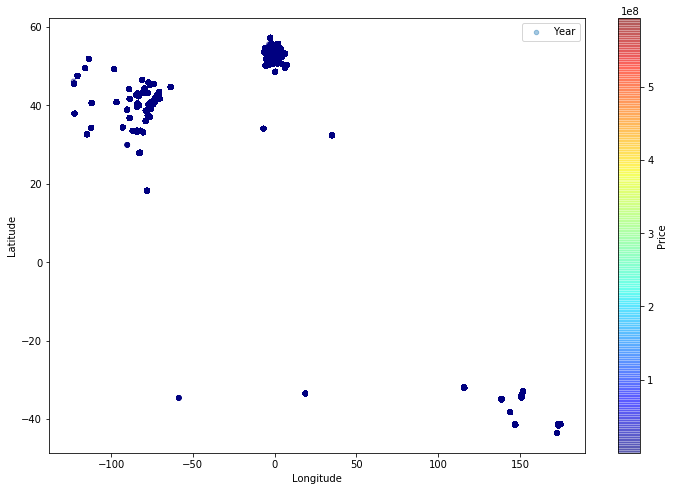

In [0]:
_= dataset.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
             s=dataset["Year"]/100, label="Year", figsize=(12,8),
             c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

Text(0.5, 1, 'Boxplot showing distribution of houses sold per month')

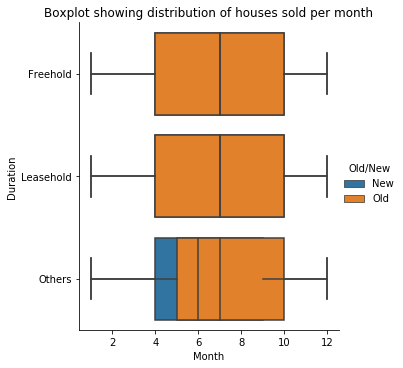

In [0]:
_=sns.catplot(x="Month", y="Duration", hue="Old/New",
            kind="box", dodge=False, data=dataset)
plt.title('Boxplot showing distribution of houses sold per month')

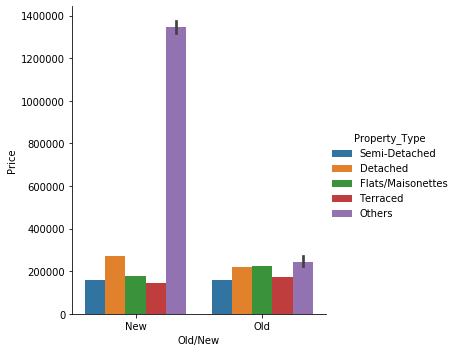

In [0]:
sns.catplot(x="Old/New", y="Price", hue="Property_Type", kind="bar", data= dataset)

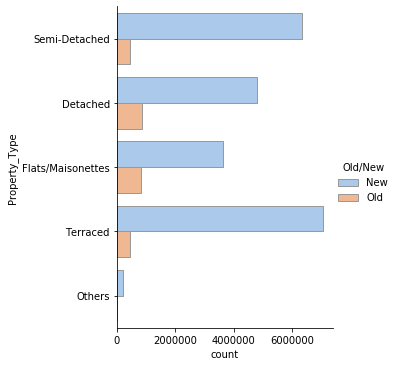

In [0]:
_= sns.catplot(y="Property_Type", hue="Old/New", kind="count",
            palette="pastel", edgecolor=".6",
            data= dataset)

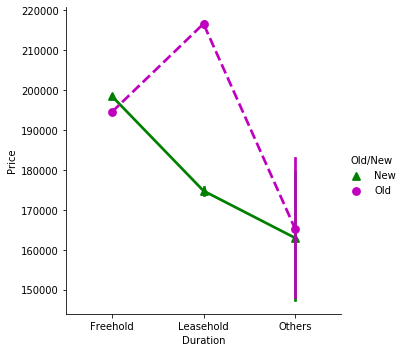

In [0]:
sns.catplot(x="Duration", y="Price", hue="Old/New",
            palette={"New": "g", "Old": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=dataset)

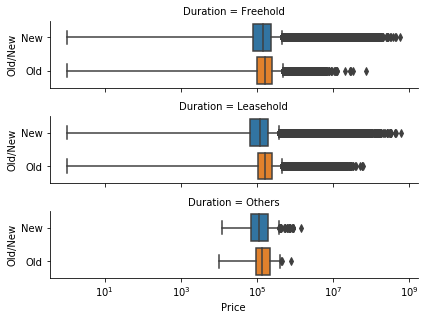

In [0]:
ax = sns.catplot(x="Price", y="Old/New", row="Duration",
                kind="box", orient="h", height=1.5, aspect=4,
                data=dataset.query("Price > 0"))
ax.set(xscale="log")
plt.show()

In [0]:
#_=sns.catplot(x="Duration", y="Price", kind="boxen",
#            data=dataset.sort_values("Duration"))

In [0]:
#dataset.iloc[:,4][dataset.iloc[:,4]!='LONDON']='OTHERS'
#dataset.City.value_counts()

#### OnehotEncoding of Categorical variables using get_dummies method

In [11]:
def get_dummie(data,cat_feat=None):
    dummie_variables=pd.get_dummies(data[cat_feat])
    df=data.drop(cat_feat, axis=1,)
    return pd.concat([df,dummie_variables],axis=1)

In [12]:
features=['Property_Type','Old/New', 'Duration']
dataset_new = dataset[['Property_Type','Old/New','Duration','Latitude','Longitude','Year','Month','Day','Price']] # drop City column to reduce high cardinality
dataset_trsfm=get_dummie(dataset_new,cat_feat=features)
dataset_trsfm.head()

,Latitude,Longitude,Year,Month,Day,Price,Property_Type_Detached,Property_Type_Flats/Maisonettes,Property_Type_Others,Property_Type_Semi-Detached,Property_Type_Terraced,Old/New_New,Old/New_Old,Duration_Freehold,Duration_Leasehold,Duration_Others
0,54.97,-1.61,1995,12,21,42000,0,0,0,1,0,1,0,1,0,0
1,51.48,0.33,1995,3,3,95000,0,0,0,1,0,1,0,1,0,0
2,53.19,-2.44,1995,10,3,74950,1,0,0,0,0,0,1,1,0,0
3,54.61,-1.29,1995,11,14,43500,0,0,0,1,0,1,0,1,0,0
4,54.52,-3.52,1995,9,8,63000,0,0,0,1,0,1,0,1,0,0


### Correlation between Price as other features
- There is poor correlation between the house price and all the features
- Relation between house price and the features is non-linear

In [0]:
corr_matrix = dataset_trsfm.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                              1.000000
Property_Type_Others               0.148836
Year                               0.120386
Property_Type_Detached             0.052929
Duration_Freehold                  0.009697
Longitude                          0.008205
Old/New_Old                        0.004036
Month                              0.002519
Duration_Others                   -0.000199
Day                               -0.002792
Old/New_New                       -0.004036
Property_Type_Flats/Maisonettes   -0.005240
Latitude                          -0.005840
Duration_Leasehold                -0.009696
Property_Type_Semi-Detached       -0.031061
Property_Type_Terraced            -0.045492
Name: Price, dtype: float64

### Heat map that shows correlation between the features

In [17]:
def Heat_map(data, features):
    plt.figure(figsize=(15, 12))
    sns.heatmap(data[features].corr(), cmap='RdBu', annot=True)
    plt.xticks(rotation=45)                     

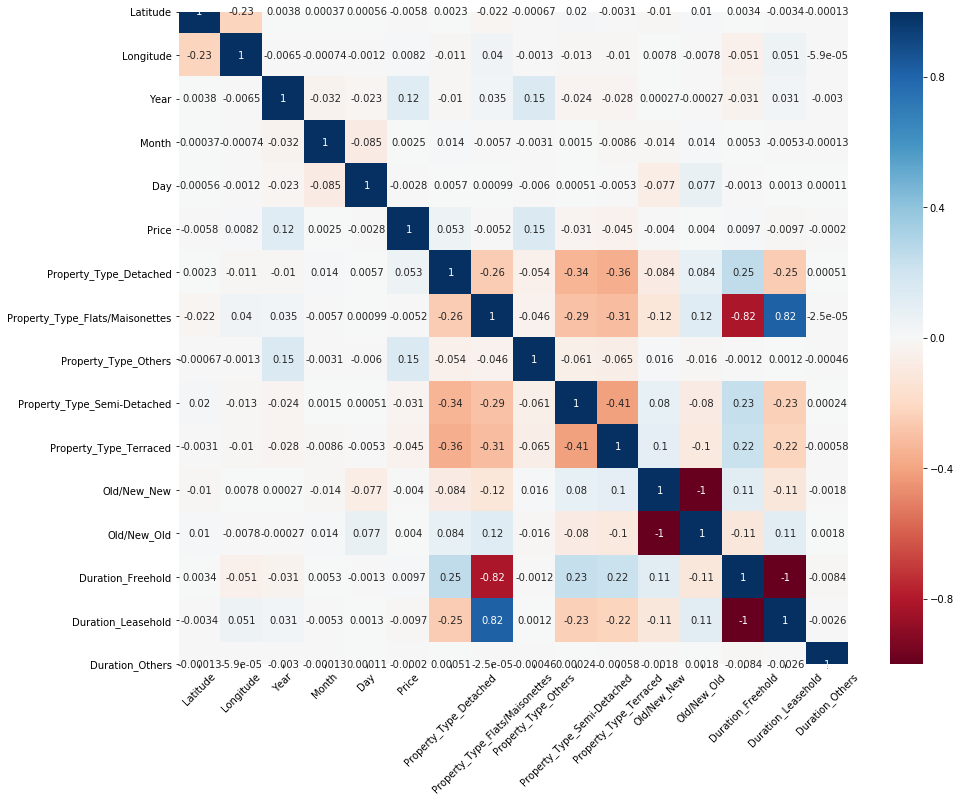

In [18]:
Heat_map(dataset_trsfm,list(dataset_trsfm.columns))

In [22]:
dataset_trsfm = dataset_trsfm[['Latitude','Longitude','Year','Month','Day','Property_Type_Detached', 'Property_Type_Flats/Maisonettes','Property_Type_Others','Property_Type_Semi-Detached', 'Property_Type_Terraced', 'Old/New_New','Old/New_Old', 'Duration_Freehold','Duration_Leasehold','Duration_Others','Price']]
dataset_trsfm.head()

,Latitude,Longitude,Year,Month,Day,Property_Type_Detached,Property_Type_Flats/Maisonettes,Property_Type_Others,Property_Type_Semi-Detached,Property_Type_Terraced,Old/New_New,Old/New_Old,Duration_Freehold,Duration_Leasehold,Duration_Others,Price
0,54.97,-1.61,1995,12,21,0,0,0,1,0,1,0,1,0,0,42000
1,51.48,0.33,1995,3,3,0,0,0,1,0,1,0,1,0,0,95000
2,53.19,-2.44,1995,10,3,1,0,0,0,0,0,1,1,0,0,74950
3,54.61,-1.29,1995,11,14,0,0,0,1,0,1,0,1,0,0,43500
4,54.52,-3.52,1995,9,8,0,0,0,1,0,1,0,1,0,0,63000


In [24]:
from sklearn.model_selection import train_test_split
features= dataset_trsfm.iloc[:,:-2]
target=dataset_trsfm.iloc[:,-1]
train_features,test_features, train_target,test_target=train_test_split(features,target,test_size=0.3, random_state=42)
print('The number of training set is: {}. \nThe number of test set is: {}' .format(train_features.shape[0],test_features.shape[0]) )

The number of training set is: 17261631. 
The number of test set is: 7397843
